In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# Set the input and output directories
input_dir = "input-images"
output_dir = "output-images"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create an instance of ImageDataGenerator with desired transformations
datagen = ImageDataGenerator(
    rescale=1./255,                 # rescale pixel values between 0 and 1
    rotation_range=20,              # rotate images randomly up to 20 degrees
    width_shift_range=0.1,          # shift the width of the image by 10% randomly
    height_shift_range=0.1,         # shift the height of the image by 10% randomly
    shear_range=0.2,                # apply shear transformation randomly
    zoom_range=0.2,                 # zoom in/out randomly by 20%
    horizontal_flip=True,           # flip images horizontally randomly
    fill_mode='nearest'             # fill points outside the input boundaries using the nearest value
)

# Flow the images from the input directory using the ImageDataGenerator
image_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(200, 200),    # resize images to a specific size
    batch_size=1,              # process images in batches of 1
    class_mode=None,           # no class labels are provided
    shuffle=False              # maintain the original order of images
)


Found 472 images belonging to 2 classes.


In [9]:
# Iterate through each image generated by the ImageDataGenerator
for i, image in enumerate(image_generator):
    output_filename = f"augmented_{i}.jpg"
    output_path = os.path.join(output_dir, output_filename)
    image = (image[0] * 255).astype('uint8')  # rescale the image to 0-255 range and convert to uint8
    cv2.imwrite(output_path, image)

    if i == len(image_generator)-1:
        break

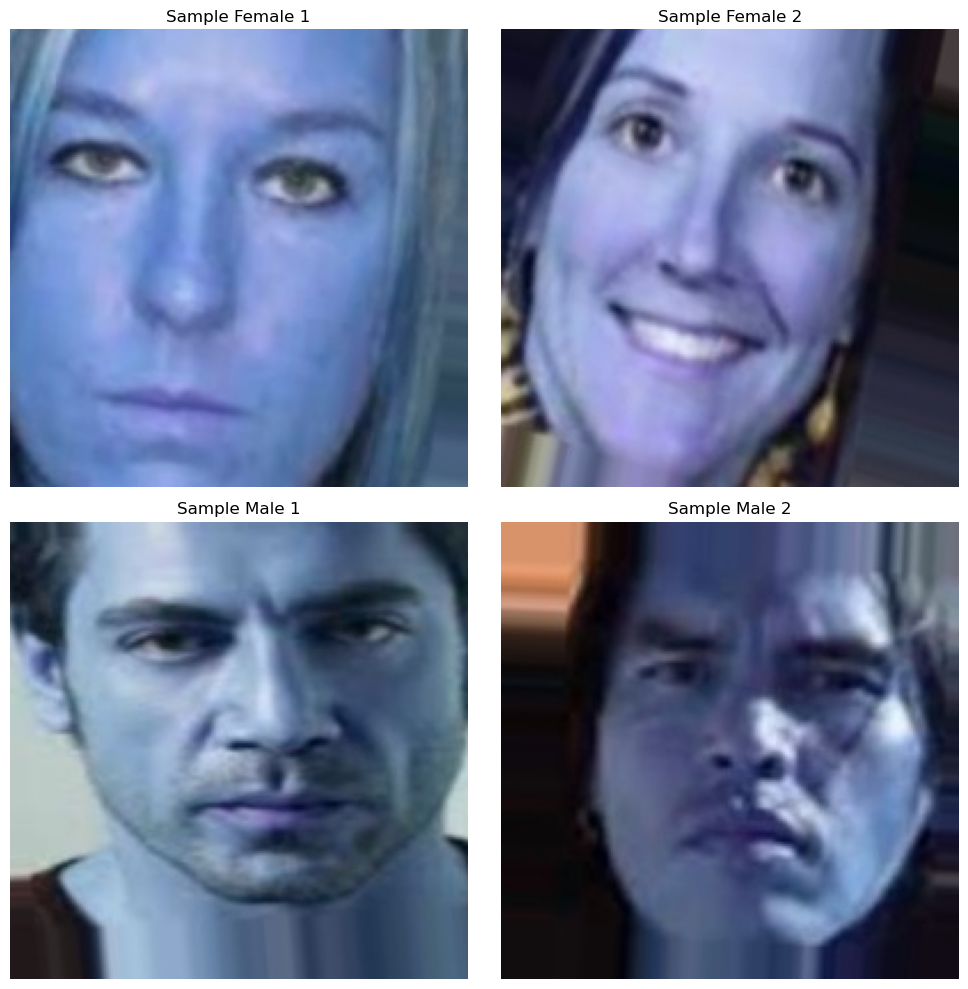

In [11]:
# Load the four images using OpenCV
image1 = cv2.imread("output-images/augmented_0.jpg")
image2 = cv2.imread("output-images/augmented_1.jpg")
image3 = cv2.imread("output-images/augmented_470.jpg")
image4 = cv2.imread("output-images/augmented_471.jpg")

# Convert the images from BGR to RGB format
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the images on subplots
axes[0, 0].imshow(image1)
axes[0, 0].set_title("Sample Female 1")
axes[0, 1].imshow(image2)
axes[0, 1].set_title("Sample Female 2")
axes[1, 0].imshow(image3)
axes[1, 0].set_title("Sample Male 1")
axes[1, 1].imshow(image4)
axes[1, 1].set_title("Sample Male 2")

# Remove the axis labels
for ax in axes.flatten():
    ax.axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()